In [5]:
# Base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# API
import python_filmaffinity

# Configuration
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
df = pd.read_csv("../datasets/filmaffinity.csv", encoding="latin-1")
df.head()

,rating,film,rating_date
0,6,Star Wars IV: A New Hope (1977),"July 10, 2022, 4:24 PM"
1,6,The Hidden Fortress (1958),"July 10, 2022, 3:52 PM"
2,6,Kids Return (1996),"July 10, 2022, 3:37 PM"
3,5,AlphaGo (2017),"July 9, 2022, 0:31 PM"
4,3,"Extremely Wicked, Shockingly Evil and Vile (2019)","July 3, 2022, 11:35 AM"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       1369 non-null   int64 
 1   film         1369 non-null   object
 2   rating_date  1369 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.2+ KB


In [8]:
df["year"] = df.film.apply(lambda x: x[-5:-1]).astype(int)

In [9]:
df["decade"] = df.film.apply(lambda x: x[-5:-2]+"0").astype(int)

In [10]:
df["film"] = df.film.apply(lambda x: x[:-7])

In [11]:
x_bar = df.rating.mean()
x_std = df.rating.std()
print(f"Mean: {x_bar}, Standard deviation: {x_std}")

Mean: 3.8991964937910883, Standard deviation: 2.388154416625612


In [12]:
df["z_score"] = (df.rating - x_bar) /x_std

In [13]:
df.head()

,rating,film,rating_date,year,decade,z_score
0,6,Star Wars IV: A New Hope,"July 10, 2022, 4:24 PM",1977,1970,0.879677
1,6,The Hidden Fortress,"July 10, 2022, 3:52 PM",1958,1950,0.879677
2,6,Kids Return,"July 10, 2022, 3:37 PM",1996,1990,0.879677
3,5,AlphaGo,"July 9, 2022, 0:31 PM",2017,2010,0.460943
4,3,"Extremely Wicked, Shockingly Evil and Vile","July 3, 2022, 11:35 AM",2019,2010,-0.376524


In [14]:
df[["rating", "z_score"]].describe()

,rating,z_score
count,1369.000000,1.369000e+03
mean,3.899196,-2.893879e-15
std,2.388154,1.000000e+00
min,1.000000,-1.213990e+00
25%,1.000000,-1.213990e+00
50%,3.000000,-3.765236e-01
75%,6.000000,8.796766e-01
max,10.000000,2.554610e+00


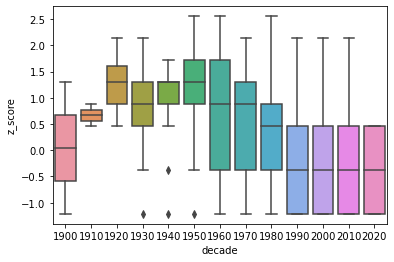

In [15]:
sns.boxplot(df.decade, df.z_score)
plt.show()

In [19]:
service = python_filmaffinity.FilmAffinity(lang='en')

In [20]:
service.get_movie(title="The Sacrifice")

{'id': '514001',
 'title': 'The Weeknd: Sacrifice (Music Video)',
 'original_title': 'The Weeknd: Sacrifice',
 'year': '2022',
 'duration': '4 min.',
 'rating': '5.4',
 'votes': 25,
 'description': "Music video for the The Weeknd's song Sacrifice. Directed by Cliqua.",
 'directors': ['Pasqual Gutierrez', 'R.J. Sanchez', 'Cliqua'],
 'writers': [],
 'music': [],
 'cinematography': [],
 'actors': ['The Weeknd'],
 'producers': ['Universal Music', 'Republic Records', 'Somesuch', 'YouTube'],
 'poster': 'https://pics.filmaffinity.com/the_weeknd_sacrifice-729365874-mmed.jpg',
 'country': 'United States',
 'genre': ['Musical'],
 'awards': [],
 'reviews': []}